In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16
from sklearn.metrics import classification_report
from time import time
from pathlib import Path

In [20]:
print("TensorFlow version:", tf.__version__)
print("Available devices:")
for device in tf.config.list_physical_devices():
    print(device)

TensorFlow version: 2.19.0
Available devices:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


In [21]:
data_path = './old_data'
batch_size = 64

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16
from sklearn.metrics import classification_report
from time import time

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory(
    directory=data_path + '/train',
    target_size=(48, 48),
    color_mode='rgb',
    class_mode='categorical',
    subset='training',
    batch_size=batch_size
)

valid_dataset = valid_datagen.flow_from_directory(
    directory=data_path + '/train',
    target_size=(48, 48),
    color_mode='rgb',
    class_mode='categorical',
    subset='validation',
    batch_size=batch_size
)

test_dataset = test_datagen.flow_from_directory(
    directory=data_path + '/test',
    target_size=(48, 48),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [23]:
base_model = VGG16(input_shape=(48, 48, 3), include_top=False, weights="imagenet")
for layer in base_model.layers[:-4]:
    layer.trainable = False

model = Sequential([
    base_model,
    Dropout(0.5),
    Flatten(),
    BatchNormalization(),
    Dense(32, kernel_initializer='he_uniform'),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(32, kernel_initializer='he_uniform'),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(32, kernel_initializer='he_uniform'),
    BatchNormalization(),
    Activation('relu'),
    Dense(7, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,735,879 (56.21 MB)

 Trainable params: 7,099,399 (27.08 MB)

 Non-trainable params: 7,636,480 (29.13 MB)

In [24]:
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred):
    y_pred_bin = K.round(y_pred)
    tp = K.sum(K.cast(y_true * y_pred_bin, 'float'), axis=0)
    predicted_positives = K.sum(K.cast(y_pred_bin, 'float'), axis=0)
    possible_positives = K.sum(K.cast(y_true, 'float'), axis=0)
    precision = tp / (predicted_positives + K.epsilon())
    recall = tp / (possible_positives + K.epsilon())
    f1 = 2 * precision * recall / (precision + recall + K.epsilon())
    return K.mean(f1)

METRICS = [
    tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
    f1_score
]

lrd = ReduceLROnPlateau(monitor='val_loss', patience=10, verbose=1, factor=0.5, min_lr=1e-6)
es = EarlyStopping(patience=20, restore_best_weights=True, verbose=1)
mcp = ModelCheckpoint('results/best_model.keras', save_best_only=True)

In [25]:
class PerClassMetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, val_dataset, class_names):
        super().__init__()
        self.val_dataset = val_dataset
        self.class_names = class_names

    def on_epoch_end(self, epoch, logs=None):
        y_true = []
        y_pred = []
        for batch_x, batch_y in self.val_dataset:
            preds = self.model.predict(batch_x, verbose=0)
            y_true.extend(np.argmax(batch_y, axis=1))
            y_pred.extend(np.argmax(preds, axis=1))
            if len(y_true) >= self.val_dataset.samples:
                break
        report = classification_report(y_true, y_pred, target_names=self.class_names, zero_division=0)
        print(f"\n[Epoch {epoch+1}] Classification Report:\n{report}")

class_names = list(train_dataset.class_indices.keys())
per_class_cb = PerClassMetricsCallback(valid_dataset, class_names)

In [26]:
# Train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=METRICS)

start_time = time()

history = model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=15,
    callbacks=[lrd, es, mcp, per_class_cb],
    verbose=1
)

end_time = time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

# 279s - 3min 40s

Epoch 1/15


/Users/yuyi/Desktop/DeepLearningProject/venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.1958 - auc: 0.5833 - f1_score: 0.0054 - loss: 1.9733 - precision: 0.1690 - recall: 0.0039
[Epoch 1] Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00       799
     disgust       0.00      0.00      0.00        87
        fear       0.00      0.00      0.00       819
       happy       0.25      1.00      0.40      1443
     neutral       0.00      0.00      0.00       993
         sad       0.00      0.00      0.00       966
    surprise       0.00      0.00      0.00       634

    accuracy                           0.25      5741
   macro avg       0.04      0.14      0.06      5741
weighted avg       0.06      0.25      0.10      5741

359/359 ━━━━━━━━━━━━━━━━━━━━ 239s 662ms/step - accuracy: 0.1959 - auc: 0.5833 - f1_score: 0.0054 - loss: 1.9731 - precision: 0.1690 - recall: 0.0038 - val_accuracy: 0.2513 - val_auc: 0.6386 - val_f1_score: 0.0000e+00 - val_

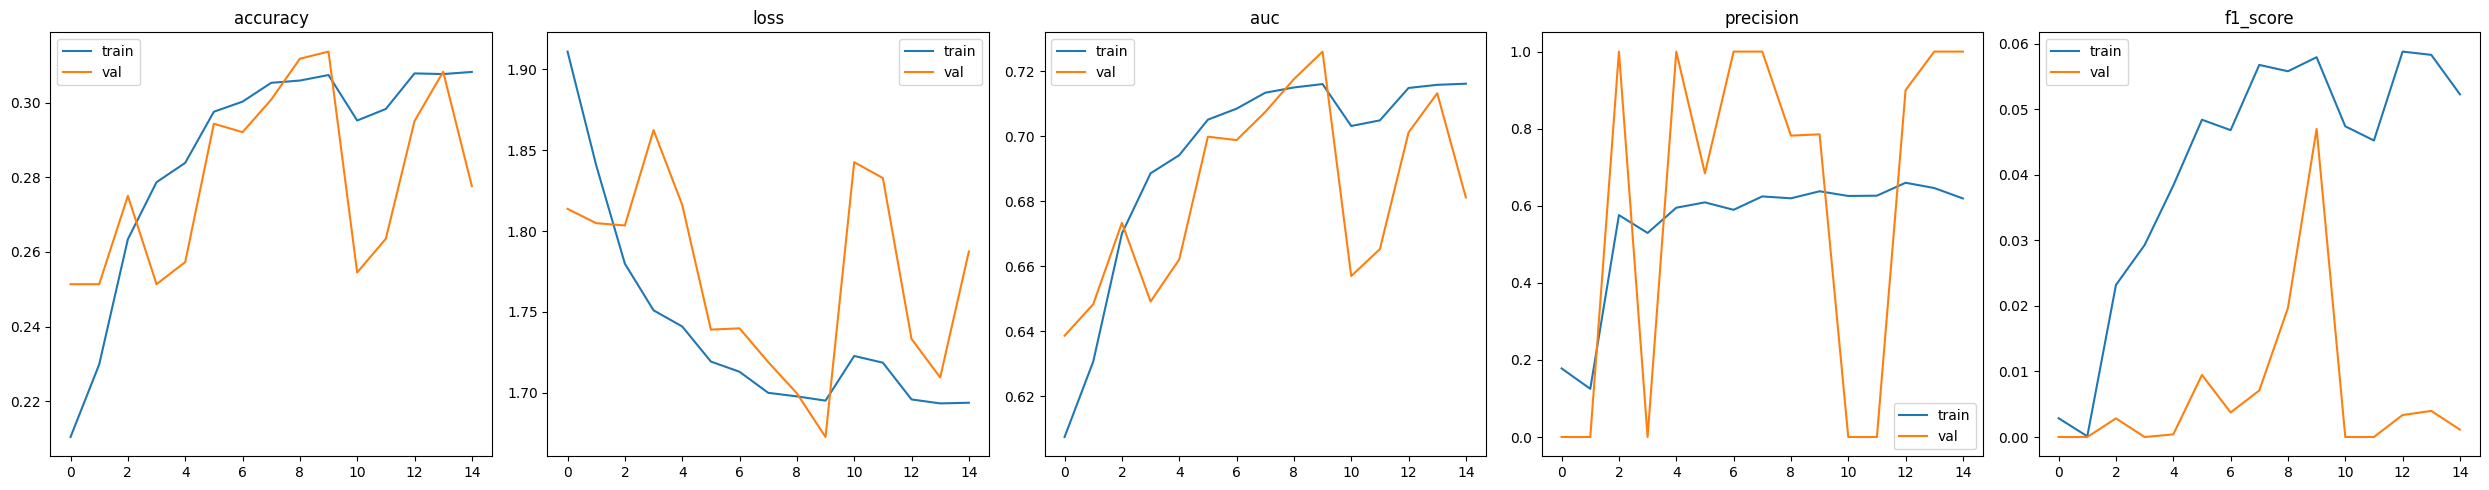

In [27]:
import matplotlib.pyplot as plt

# Plot results and save
def plot_history(history, filename='results/baseline_training_metrics.png'):
    metrics = ['accuracy', 'loss', 'auc', 'precision', 'f1_score']
    fig, axes = plt.subplots(1, len(metrics), figsize=(25, 5))
    for i, m in enumerate(metrics):
        axes[i].plot(history.history[m])
        axes[i].plot(history.history[f'val_{m}'])
        axes[i].set_title(m)
        axes[i].legend(['train', 'val'])
    plt.tight_layout()
    plt.savefig(filename)  # Save the figure
    plt.show()

plot_history(history)